In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
import scipy.stats

datavel=pd.read_pickle(r'Datavel_int.pickle')

In [107]:
fads_vel=np.hstack(datavel['velocidad'])
ustk=np.hstack(datavel['ustk_int'])
vstk=np.hstack(datavel['vstk_int'])

utotal=np.hstack(datavel['utotal_int'])
vtotal=np.hstack(datavel['vtotal_int'])
bio=np.hstack(datavel['bio'])[0:-1]


18647

In [108]:
Vstk=np.sqrt(ustk**2+vstk**2)
Vtotal=np.sqrt(utotal**2+vtotal**2)

diff_stk=Vstk-fads_vel
bio_stk=bio[~np.isnan(diff_stk)]
diff_stk= diff_stk[~np.isnan(diff_stk)]

diff_total=Vtotal-fads_vel
bio_total=bio[~np.isnan(diff_total)]
diff_total= diff_total[~np.isnan(diff_total)]

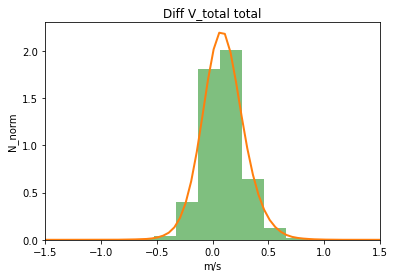

In [137]:
#plt.hist(Vtotal-fads_vel)

bw_values =  [None]

# generate a list of kde estimators for each bw
kde = [scipy.stats.gaussian_kde(diff_total,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data

plt.hist(diff_total, bins=300, density=True, facecolor='green', alpha=0.5);

t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2)
plt.xlim(-1,6)
#plt.legend(loc='best')

plt.xlim(-1.5,1.5)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_total total')
plt.savefig('Diff_total_total.png', dpi=300)

In [117]:
diff_total_bio=diff_total[np.where(pd.DataFrame(bio_total)[0].str.contains('BIO'))[0]]
diff_stk_bio=diff_stk[np.where(pd.DataFrame(bio_stk)[0].str.contains('BIO'))[0]]

diff_total_con=diff_total[np.where(pd.DataFrame(bio_total)[0].str.contains('CON'))[0]]
diff_stk_con=diff_stk[np.where(pd.DataFrame(bio_stk)[0].str.contains('CON'))[0]]

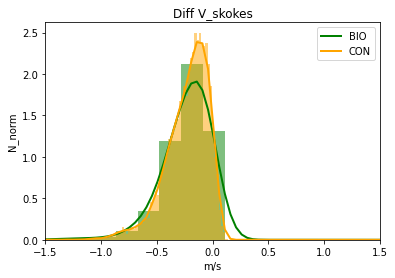

In [134]:
kde = [scipy.stats.gaussian_kde(diff_stk_bio,bw_method=bw) for bw in bw_values]

plt.hist(diff_stk_bio, bins=300, density=True, facecolor='green', alpha=0.5);

t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2,color='green',label='BIO')

#plt.legend(loc='best')
kde = [scipy.stats.gaussian_kde(diff_stk_con,bw_method=bw) for bw in bw_values]

plt.hist(diff_stk_con, bins=300, density=True, facecolor='orange', alpha=0.5);

t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2,color='orange',label='CON')

plt.legend(loc='best')

plt.xlim(-1.5,1.5)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_skokes')
plt.savefig('Diff_stokes.png', dpi=300)

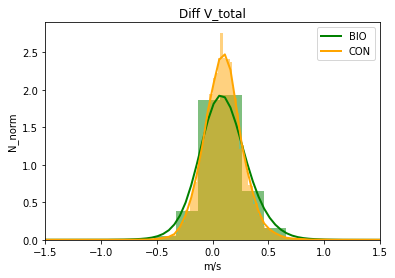

In [135]:
kde = [scipy.stats.gaussian_kde(diff_total_bio,bw_method=bw) for bw in bw_values]

plt.hist(diff_total_bio, bins=300, density=True, facecolor='green', alpha=0.5);

t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2,color='green',label='BIO')

#plt.legend(loc='best')
kde = [scipy.stats.gaussian_kde(diff_total_con,bw_method=bw) for bw in bw_values]

plt.hist(diff_total_con, bins=300, density=True, facecolor='orange', alpha=0.5);

t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2,color='orange',label='CON')

plt.legend(loc='best')

plt.xlim(-1.5,1.5)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_total')
plt.savefig('Diff_total.png', dpi=300)